**Autor:** George Estrella  
**Fecha:** Noviembre 19, 2024  
**Tópico:** Retornos

**Retornos Netos o Simples**  
Tenemos que $P_t$ es el precio del activo en el periodo $t$. Asumimos que no se pagan dividendos.  
$$
R_{t} = \frac{P_t}{P_{t-1}} -1 = \frac{P_{t}-P_{t-1}}{P_{t-1}}
$$

Donde:  
$R_t:$ Es el retorno aritmetico en el periodo $t$.  
$P_{t}:$ Es el precio de cierre en el periodo $t$.  
$P_{t}:$ Es el precio de cierre en el periodo $t-1$.  
 
**Log Returns**  
$$
r_t = \log(R_t + 1)=\log\left(\frac{P_t}{P_{t-1}}\right) = p_t - p_{t-1}
$$

Donde:  
$r_t:$ es el retorno logaritmico en el periodo $t$.  
$p_t:$ Es el precio logatirmico en el periodo $t$.  
$p_{t-1}:$ Es el precio logaritmico en el periodo $t-1$  

**Nota**  
Los retornos logaritmicos son aproximadamente igual a los retornos simples porque si $x$ es pequeño, luego $log(1+x) \approx x$

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

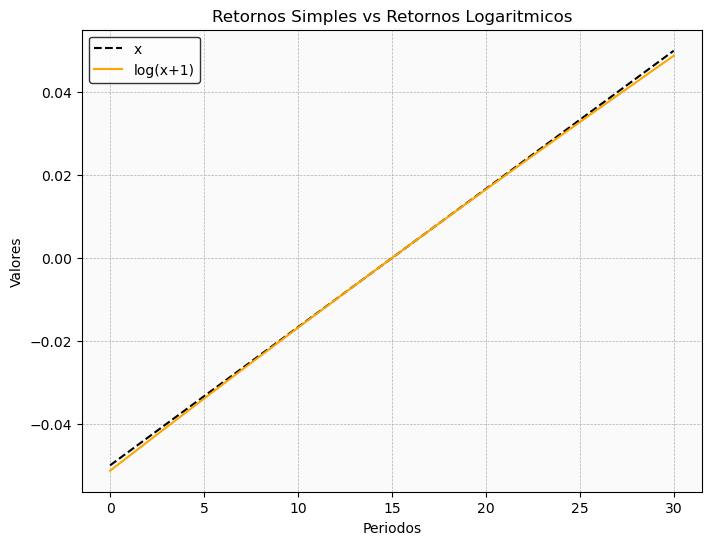

In [68]:
# Datos
datos = np.linspace(-0.05, 0.05, num=31)
datos = pd.DataFrame(datos, columns=["x"])
datos["log(x+1)"] = np.log(datos["x"] + 1)

# Grafico comparativo
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#fafafa")
plt.plot(datos["x"], label="x", linestyle="--",color="black")
plt.plot(datos["log(x+1)"], label="log(x+1)",color="orange")
plt.xlabel("Periodos")
plt.ylabel("Valores")
plt.title("Retornos Simples vs Retornos Logaritmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

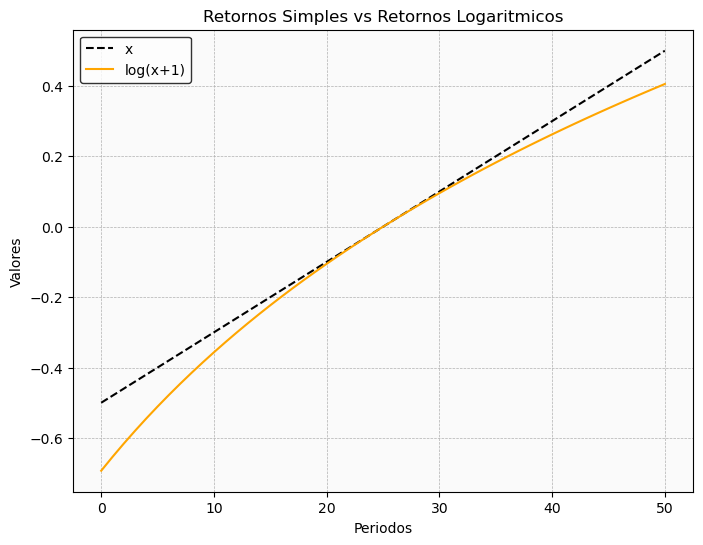

In [69]:
# Datos
datos = np.linspace(-0.5, 0.5, num=51)
datos = pd.DataFrame(datos, columns=["x"])
datos["log(x+1)"] = np.log(datos["x"] + 1)

# Grafico comparativo
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#fafafa")
plt.plot(datos["x"], label="x", linestyle="--",color="black")
plt.plot(datos["log(x+1)"], label="log(x+1)",color="orange")
plt.xlabel("Periodos")
plt.ylabel("Valores")
plt.title("Retornos Simples vs Retornos Logaritmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

In [70]:
# Extraccion de Datos
data_1 = yf.download("AMZN", start="1990-01-01", end="2024-05-01")["Close"].reset_index()
data_1.head(10)

[*********************100%%**********************]  1 of 1 completed


,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
5,1997-05-22,0.069792
6,1997-05-23,0.075000
7,1997-05-27,0.079167
8,1997-05-28,0.076563
9,1997-05-29,0.075260


In [71]:
# Calculo de los Retornos
data = data_1.copy()
data["Simple_Returns"] = data["Close"]/data["Close"].shift(1) - 1
data["Log_Returns"] = np.log(data["Close"]/data["Close"].shift(1))
data = data.dropna(subset=["Log_Returns"]).reset_index(drop=True)
data["Simple_Returns"] = round(data["Simple_Returns"],6)
data["Log_Returns"] = round(data["Log_Returns"],6)
data.head(10)

,Date,Close,Simple_Returns,Log_Returns
0,1997-05-16,0.086458,-0.117028,-0.124461
1,1997-05-19,0.085417,-0.012040,-0.012114
2,1997-05-20,0.081771,-0.042685,-0.043623
3,1997-05-21,0.071354,-0.127392,-0.136269
4,1997-05-22,0.069792,-0.021891,-0.022134
5,1997-05-23,0.075000,0.074622,0.071969
6,1997-05-27,0.079167,0.055560,0.054071
7,1997-05-28,0.076563,-0.032892,-0.033446
8,1997-05-29,0.075260,-0.017019,-0.017165
9,1997-05-30,0.075000,-0.003455,-0.003461


In [72]:
data = data.sort_values(by=["Simple_Returns"], ascending=[True]).reset_index(drop=True)
data.head(10)

,Date,Close,Simple_Returns,Log_Returns
0,2001-07-24,0.603000,-0.247661,-0.284568
1,2006-07-26,1.313000,-0.218220,-0.246182
2,1998-08-31,0.697917,-0.209089,-0.234570
3,2001-10-24,0.382000,-0.200000,-0.223144
4,2000-06-23,1.693750,-0.193452,-0.214992
5,1999-01-20,2.825000,-0.191775,-0.212915
6,2002-07-01,0.677500,-0.166154,-0.181706
7,1999-04-19,3.973438,-0.163487,-0.178513
8,1997-09-15,0.154688,-0.161014,-0.175562
9,1997-10-27,0.213542,-0.150257,-0.162822


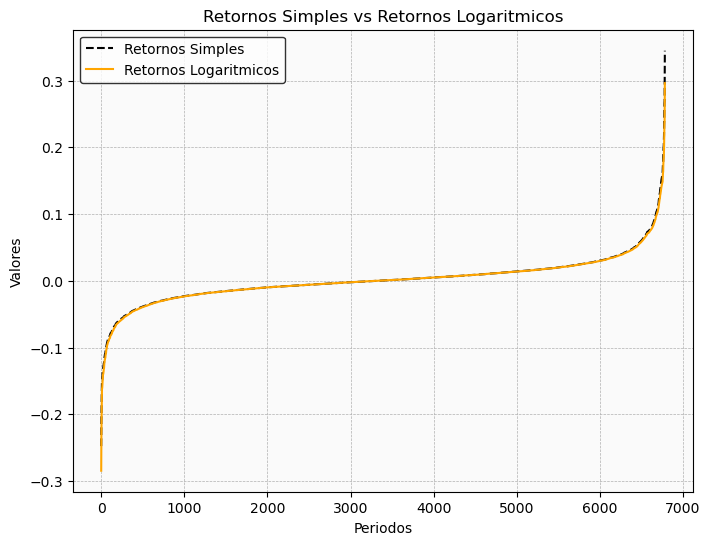

In [73]:
# Visualizacion
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#fafafa")
plt.plot(data["Simple_Returns"], label="Retornos Simples", linestyle="--",color="black")
plt.plot(data["Log_Returns"], label="Retornos Logaritmicos",color="orange")
plt.xlabel("Periodos")
plt.ylabel("Valores")
plt.title("Retornos Simples vs Retornos Logaritmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

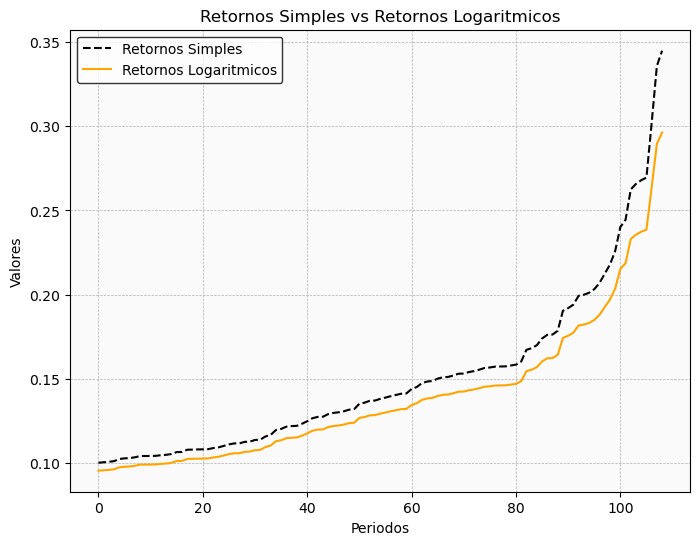

In [74]:
# Retornos mayores al 10%
data1 = data[data["Simple_Returns"]>0.1].reset_index(drop=True)

# Visualizacion
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#fafafa")
plt.plot(data1["Simple_Returns"], label="Retornos Simples", linestyle="--",color="black")
plt.plot(data1["Log_Returns"], label="Retornos Logaritmicos",color="orange")
plt.xlabel("Periodos")
plt.ylabel("Valores")
plt.title("Retornos Simples vs Retornos Logaritmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

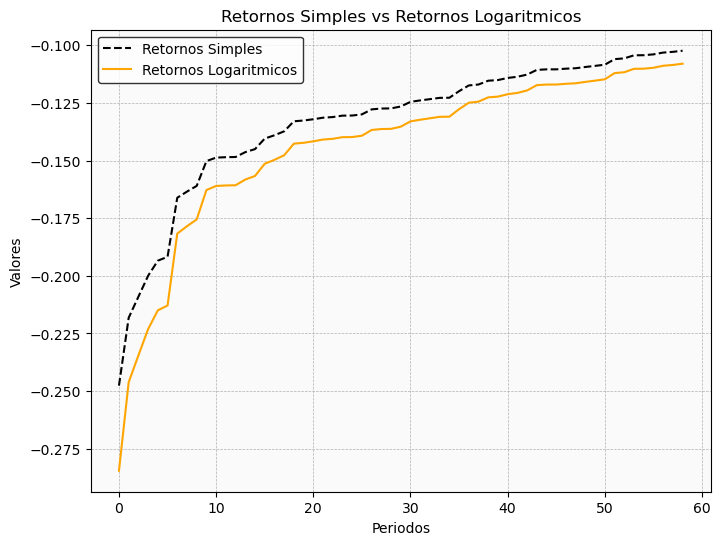

In [75]:
# Retornos menores al -10%
data2 = data[data["Simple_Returns"]<-0.1].reset_index(drop=True)

# Visualizacion
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#fafafa")
plt.plot(data2["Simple_Returns"], label="Retornos Simples", linestyle="--",color="black")
plt.plot(data2["Log_Returns"], label="Retornos Logaritmicos",color="orange")
plt.xlabel("Periodos")
plt.ylabel("Valores")
plt.title("Retornos Simples vs Retornos Logaritmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

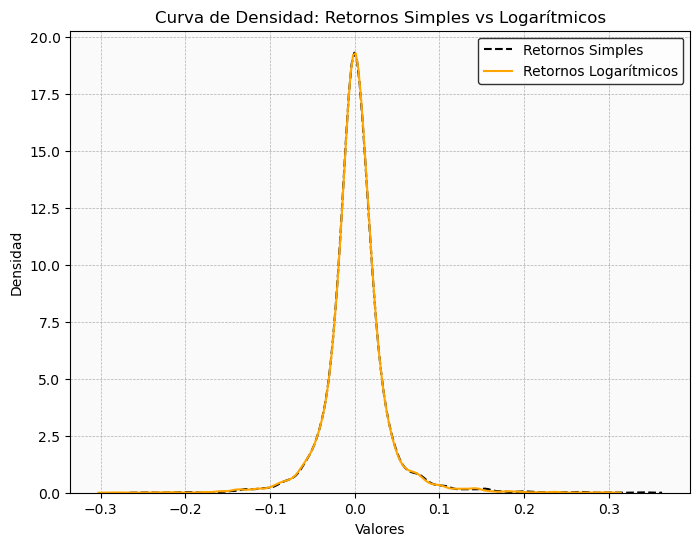

In [76]:
# Curva de Densidad
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("#fafafa")
sns.kdeplot(data["Simple_Returns"], label="Retornos Simples", color="black", linestyle="--")
sns.kdeplot(data["Log_Returns"], label="Retornos Logarítmicos", color="orange")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Curva de Densidad: Retornos Simples vs Logarítmicos")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

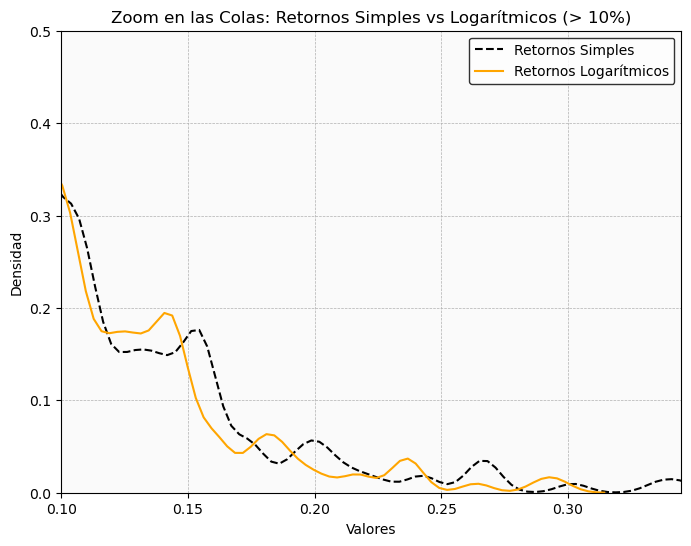

In [77]:
# Zoom Cola Derecha
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("#fafafa")
sns.kdeplot(data["Simple_Returns"], label="Retornos Simples", color="black", linestyle="--")
sns.kdeplot(data["Log_Returns"], label="Retornos Logarítmicos", color="orange")
plt.xlim(0.1, data[["Simple_Returns", "Log_Returns"]].max().max())
plt.ylim(0, 0.5)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Zoom en las Colas: Retornos Simples vs Logarítmicos (> 10%)")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show() 

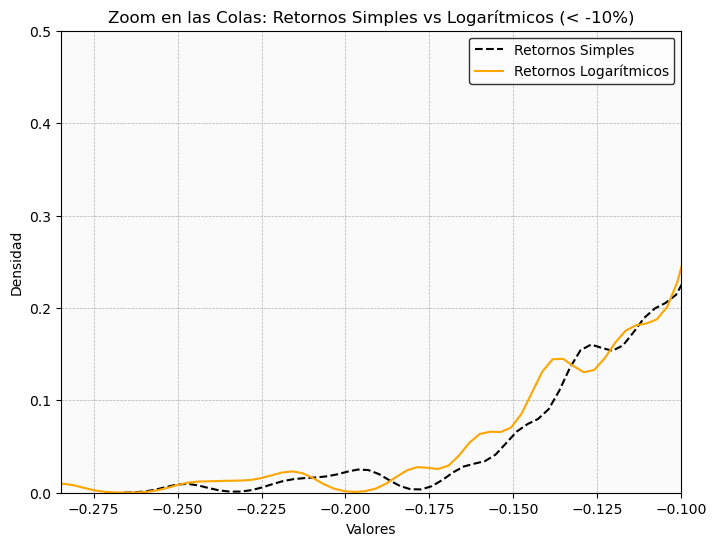

In [78]:
# Zoom Cola Izquierda
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("#fafafa")
sns.kdeplot(data["Simple_Returns"], label="Retornos Simples", color="black", linestyle="--")
sns.kdeplot(data["Log_Returns"], label="Retornos Logarítmicos", color="orange")
plt.xlim(data[["Simple_Returns", "Log_Returns"]].min().min(), -0.1)
plt.ylim(0, 0.5)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Zoom en las Colas: Retornos Simples vs Logarítmicos (< -10%)")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

In [93]:
# Nivel de confianza
confidence_level = 0.005  # 99.5% de confianza = 0.5% de probabilidad de pérdida
var_historico = data[["Simple_Returns"]].quantile(confidence_level)
var_historico

Simple_Returns   -0.122779
Name: 0.005, dtype: float64

In [101]:
sorted_returns = data["Simple_Returns"].sort_values()

# Número de observaciones
n = len(sorted_returns)

# Nivel de confianza
confidence_level = 0.995  # 99.5%

# Posición del VaR
posicion_var = int(n * (1 - confidence_level))

In [107]:
var = sorted_returns.iloc[posicion_var]
var

-0.122825

In [109]:
data.sort_values(by=["Simple_Returns"], ascending=[True]).head(34)

,Date,Close,Simple_Returns,Log_Returns
0,2001-07-24,0.603000,-0.247661,-0.284568
1,2006-07-26,1.313000,-0.218220,-0.246182
2,1998-08-31,0.697917,-0.209089,-0.234570
3,2001-10-24,0.382000,-0.200000,-0.223144
4,2000-06-23,1.693750,-0.193452,-0.214992
5,1999-01-20,2.825000,-0.191775,-0.212915
6,2002-07-01,0.677500,-0.166154,-0.181706
7,1999-04-19,3.973438,-0.163487,-0.178513
8,1997-09-15,0.154688,-0.161014,-0.175562
9,1997-10-27,0.213542,-0.150257,-0.162822


In [59]:
# Nivel de confianza
confidence_level = 0.005  # 99.5% de confianza = 0.5% de probabilidad de pérdida
var_historico = data["Log_Returns"].quantile(confidence_level)
var_historico*100

-13.099699489535075